In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans

import matplotlib.dates as mdates

In [95]:
df = pd.read_csv('preprocessed.csv', encoding = 'utf-32',sep='\t')

In [96]:
df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop('index', inplace=True, axis=1)

In [97]:
df=df.dropna().reset_index(drop=True)

In [98]:
tfidf = TfidfVectorizer(max_df=0.95,min_df=2)
dtm = tfidf.fit_transform(df['final_sentences'])

In [99]:
nmf_model = NMF(n_components=15,random_state=1234)

In [100]:
nmf_model.fit(dtm)

NMF(n_components=15, random_state=1234)

In [101]:
for index,topic in enumerate(nmf_model.components_):
    print(f'The top 20 words for topic #{index}')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-20:]])
    print('-----------------------------------------------------')

The top 20 words for topic #0
['κέντρο', 'ερευνητικός', 'μπορώ', 'με', 'χρόνος', 'επιστημονικός', 'δράση', 'εκπαιδευτικός', 'ακαδημαϊκός', 'χώρα', 'ομάδα', 'πανεπιστημιακός', 'ελληνικός', 'κοινότητα', 'ελλάδα', 'πρόγραμμα', 'εκδήλωση', 'εκπαίδευση', 'έργο', 'νέος']
-----------------------------------------------------
The top 20 words for topic #1
['προγράμματος', 'γίνομαι', 'πλαίσιο', 'δημόσιος', 'εξεταστική', 'τηλεδιάσκεψη', 'επιβλέπων', 'τριμελής', 'καθηγήτρια', 'μεταπτυχιακός', 'αση', 'ας', 'παρουσι', 'διπλωματικής', 'μεταπτυχιακής', 'μεταπτυχιακη', 'διπλωματικη', 'εργασι', 'παρουσίαση', 'εργασία']
-----------------------------------------------------
The top 20 words for topic #2
['ημέρα', 'παρ', 'σύμφωνα', 'αρ', 'κοσμήτορας', 'διαδικασία', 'απόφαση', 'ψηφοφορία', 'ανάδειξη', 'εφορευτική', 'διάταξη', 'εκλογικός', 'επιστημών', 'αριθ', 'υπ', 'φεκ', 'θητεία', 'σχολής', 'αναπληρωτής', 'εκλογή']
-----------------------------------------------------
The top 20 words for topic #3
['αναδό

In [102]:
kmeans = KMeans(n_clusters = 15,random_state = 1234)
kmeans.fit(dtm)

c:\Users\Y9GMLG726\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=15, random_state=1234)

In [103]:
feature_names = tfidf.get_feature_names_out()

for i in range(15):
    cluster_center = kmeans.cluster_centers_[i]
    cluster_top_words_indices = cluster_center.argsort()[:-21:-1]
    cluster_top_words = [feature_names[idx] for idx in cluster_top_words_indices]
    print(f"The top 20 words for Topic #{i}:")
    print(cluster_top_words)
    print('-----------------------------------------------------')

The top 20 words for Topic #0:
['διοικητικων', 'υπηρεσιων', 'διευθυνση', 'νση', 'μισθοδοσία', 'διοικητικών', 'διεύθυνση', 'γενικη', 'ενημερωση', 'υπηρεσιών', 'υπουργείου', 'οικονομικων', 'αδα', 'προς', 'από', 'αριθμ', 'δημοκρατια', 'εγώ', 'ελληνικη', 'ενημερώνω']
-----------------------------------------------------
The top 20 words for Topic #1:
['εκδήλωση', 'πρόγραμμα', 'ημερίδα', 'έργο', 'συνέδριο', 'πληροφορία', 'ελλάδα', 'πραγματοποιώ', 'συμμετοχή', 'επιστημονικός', 'κέντρο', 'δράση', 'εκπαίδευση', 'ος', 'ομάδα', 'συνεργασία', 'ερευνητικός', 'μπορώ', 'διοργανώνω', 'συνεδρίου']
-----------------------------------------------------
The top 20 words for Topic #2:
['έγκριση', 'σύμβαση', 'ορίων', 'προμήθεια', 'σύναψης', 'διαδικασίας', 'διακ', 'ηλεκτρονικός', 'αριθ', 'αξιολόγηση', 'έτος', 'κάτω', 'διακήρυξη', 'διενέργειας', 'άνω', 'συνεδρίαση', 'αναδόχου', 'ανοικτής', 'συγκρότηση', 'επί']
-----------------------------------------------------
The top 20 words for Topic #3:
['σπουδών', 'α

In [104]:
df['Topic'] = kmeans.labels_

In [105]:
df.Topic.value_counts()

Topic
14    5745
1     1464
4     1240
9      815
11     714
7      643
5      496
0      402
3      397
13     371
2      346
8      270
12     181
10     178
6       91
Name: count, dtype: int64

In [106]:
name_mapping = {
    0: 'Μισθοδοσια/Οικονομια',
    1: 'Εκδηλωσεις',
    2: 'Διοικητικα',  ##Συνεδριες/Συμβασεις     
    3: 'Ακαδημαικες Ανακοινωσεις',     ##Εκδηλωση ενδιαφεροντος για μεταπτυχιακα/διδακτωρικα  
    4: 'Παρουσιασεις',    ##  Παρουσιασεις Μεταπτυχιακων διπλωματικων εργασιων   
    5: 'Διοικητικα',  ## Εκλογες προεδρων 
    6: 'Συζητησεις',         
    7: 'Διοικητικα',  ##ΜΟΔΥ ΕΛΚΕ 
    8: 'Συλληπητηρια',
    9: 'Παρουσιασεις', ##Παρουσιασεις Διδακτορικων διατριβων
    10: 'Εκδηλωσεις',  ##Ομιλεις/Παρουσιασεις βιβλιων
    11: 'Εκδηλωσεις' ,   ##Σεμιναρια
    12: 'Διοικητικα', ##Προγραμμα ΔΙΑΥΓΕΙΑ
    13: 'Διοικητικα', ##Συνελευσεις Συλλογων
    14: 'Γενικα'    
}

In [107]:
df['Topic'] = df['Topic'].replace(name_mapping)

In [108]:
df2=df.loc[df['Topic']=='Γενικα'].reset_index(drop=True)

##2nd Iteration

In [109]:
dtm_2 = tfidf.fit_transform(df2['final_sentences'])

In [110]:
kmeans_2 = KMeans(n_clusters = 15,random_state = 1234)
kmeans_2.fit(dtm_2)

c:\Users\Y9GMLG726\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=15, random_state=1234)

In [111]:
df2['Sub_Topic']=kmeans_2.labels_

In [112]:
df2.Sub_Topic.value_counts()

Sub_Topic
2     2888
1      583
3      488
10     332
8      234
13     182
5      172
0      163
14     141
7      127
12     121
9      111
4       94
11      60
6       49
Name: count, dtype: int64

In [113]:
name_mapping = {
    0: 'Διοικητικα',  ##Ανακοινωσεις Πρυτανειας
    1: 'Συζητησεις',   ##Συγχωνευση ΑΕΙ/ΤΕΙ
    2: 'Γενικα',       
    3: 'Συζητησεις',    ##για σοβαρα θεματα λειτουργιας του Πανεπιστημιου Πατρων    
    4: 'Χαμενα αντικειμενα',         
    5: 'Αθλητικα',    
    6: 'Εκδηλωσεις',         
    7: 'Ενημερωση Ηλεκτρονικων Υπηρεσιων',     
    8: 'Γενικα',
    9: 'Εκδηλωσεις',  ##Συνελευσεις Σωματειου
    10: 'Γενικα',
    11: 'Γενικα' ,  ##Περιοδικα
    12: 'Τεχνικα προβληματα/Διακοπες',
    13: 'Εκδηλωσεις',
    14: 'Διοικητικα'    ##Θεματα Συγκλητου
}

In [114]:
df2['Sub_Topic'] = df2['Sub_Topic'].replace(name_mapping)

In [115]:
df3=df2.loc[df2['Sub_Topic']=='Γενικα'].reset_index(drop=True)

##3rd Iteration

In [116]:
dtm_3 = tfidf.fit_transform(df3['final_sentences'])

In [117]:
kmeans_3 = KMeans(n_clusters = 15,random_state = 1234)
kmeans_3.fit(dtm_3)

c:\Users\Y9GMLG726\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=15, random_state=1234)

In [118]:
df3['Sub_Sub_Topic']=kmeans_3.labels_

In [119]:
df3.Sub_Sub_Topic.value_counts()

Sub_Sub_Topic
1     1174
0      393
11     314
9      312
4      246
6      243
7      226
12     213
3       95
2       69
5       65
13      60
10      53
14      35
8       16
Name: count, dtype: int64

In [120]:
name_mapping = {
    0: 'Διοικητικα',  ##ΚΕΔΙΒΙΜ
    1: 'Γενικα', ##kostas markou
    2: 'Ακαδημαικες Ανακοινωσεις',  ##Ανακοινωσεις σχολων θετικων επιστημων     
    3: 'Παρουσιασεις',    ## Παρουσιασεις Μεταπτυχιακων διπλωματικων εργασιων 
    4: 'Γενικα',         
    5: 'Γενικα',    
    6: 'Διοικητικα',     ##Πρυτανικη Αρχη    
    7: 'Εκδηλωσεις',     
    8: 'Εκδηλωσεις',
    9: 'Γενικα',
    10: 'Μισθοδοσια/Οικονομια',
    11: 'Γενικα' ,
    12: 'Διοικητικα',  ##Εκλογες προεδρων
    13: 'Μισθοδοσια/Οικονομια',
    14: 'Εκδηλωσεις'    
}

In [121]:
df3['Sub_Sub_Topic'] = df3['Sub_Sub_Topic'].replace(name_mapping)

In [122]:
for i in range(df.shape[0]):
    for j in range(df2.shape[0]):
        if df['Author'][i]==df2['Author'][j] and df['Date'][i]==df2['Date'][j] and df['To'][i]==df2['To'][j] and df['Subject'][i]==df2['Subject'][j] and df['Message'][i]==df2['Message'][j] and df['text'][i]==df2['text'][j] and df['final_sentences'][i]==df2['final_sentences'][j] and df['Topic'][i]==df2['Topic'][j]:
            df.at[i,'Topic']=df2['Sub_Topic'][j]

In [123]:
for i in range(df.shape[0]):
    for j in range(df3.shape[0]):
        if df['Author'][i]==df3['Author'][j] and df['Date'][i]==df3['Date'][j] and df['To'][i]==df3['To'][j] and df['Subject'][i]==df3['Subject'][j] and df['Message'][i]==df3['Message'][j] and df['text'][i]==df3['text'][j] and df['final_sentences'][i]==df3['final_sentences'][j] and df['Topic'][i]==df3['Sub_Topic'][j]:
            df.at[i,'Topic']=df3['Sub_Sub_Topic'][j]

In [124]:
df.Topic.value_counts()

Topic
Διοικητικα                          3190
Εκδηλωσεις                          2975
Παρουσιασεις                        2150
Γενικα                              2111
Συζητησεις                          1162
Μισθοδοσια/Οικονομια                 515
Ακαδημαικες Ανακοινωσεις             466
Συλληπητηρια                         270
Αθλητικα                             172
Ενημερωση Ηλεκτρονικων Υπηρεσιων     127
Τεχνικα προβληματα/Διακοπες          121
Χαμενα αντικειμενα                    94
Name: count, dtype: int64

<b>Visualization</b>

In [ ]:
df['Date_only']=df['Date']

In [194]:
for i in range(len(df['Date'])):
    df['Date_only'][i]=df['Date'][i][1:11]

In [195]:
df['Date_only'][10688]='2022-07-11'

In [196]:
df['Date_only']=pd.to_datetime(df['Date_only'])

In [204]:
df['Month'] = df['Date_only'].dt.to_period('M')

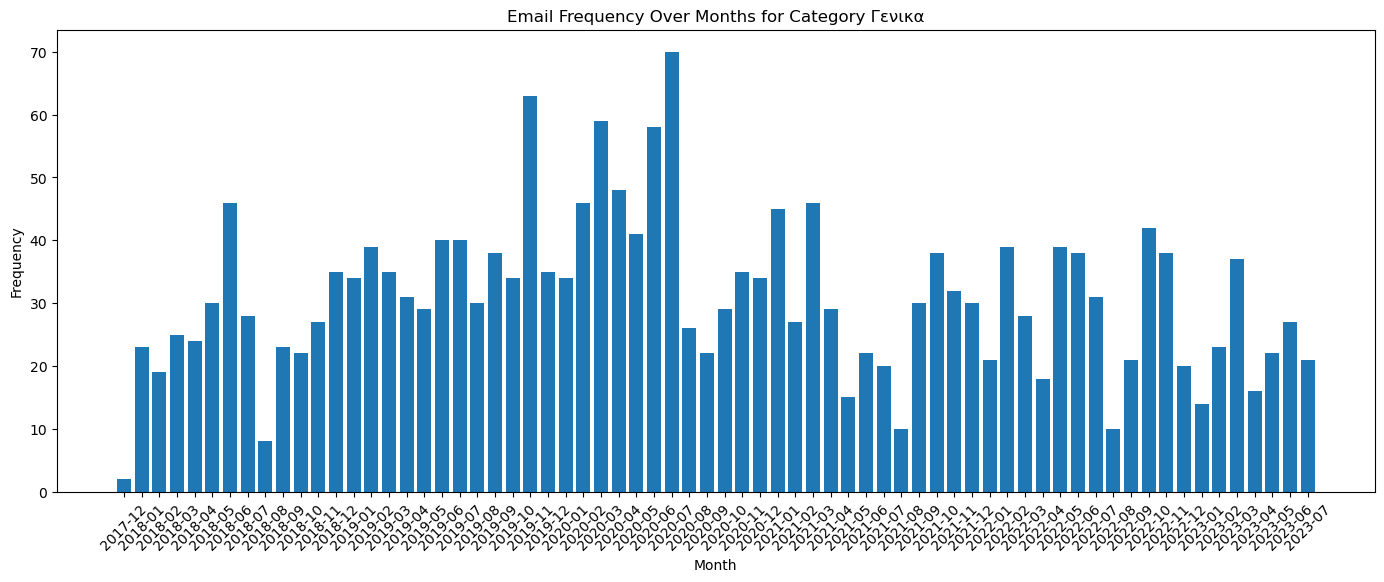

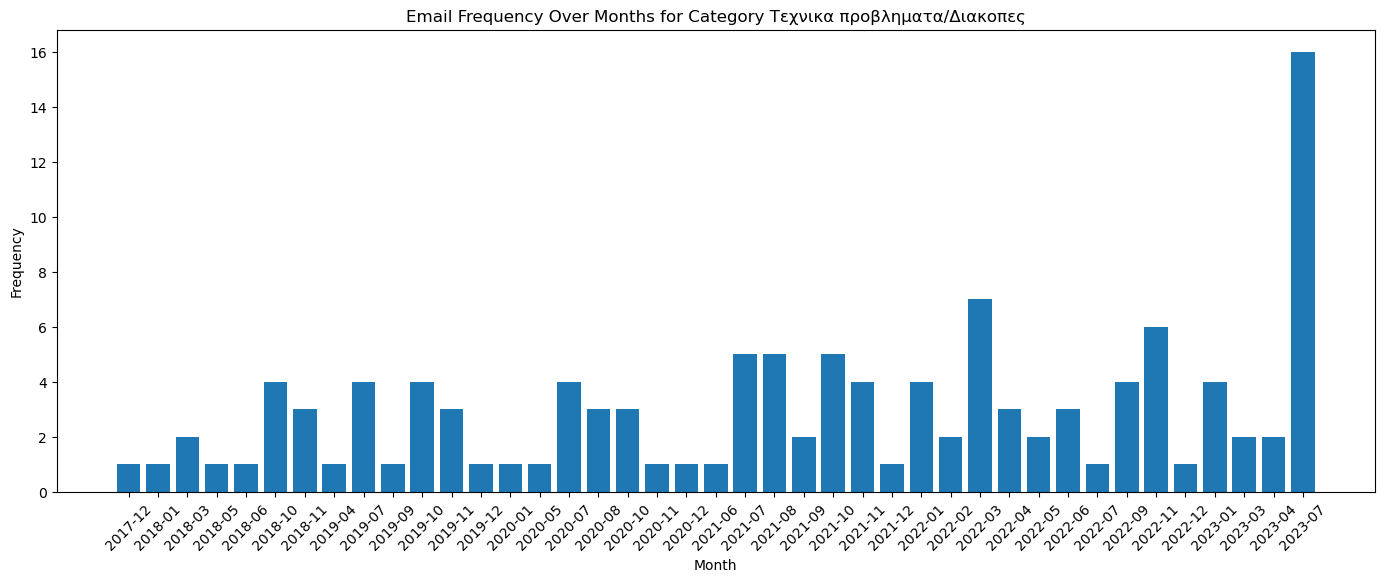

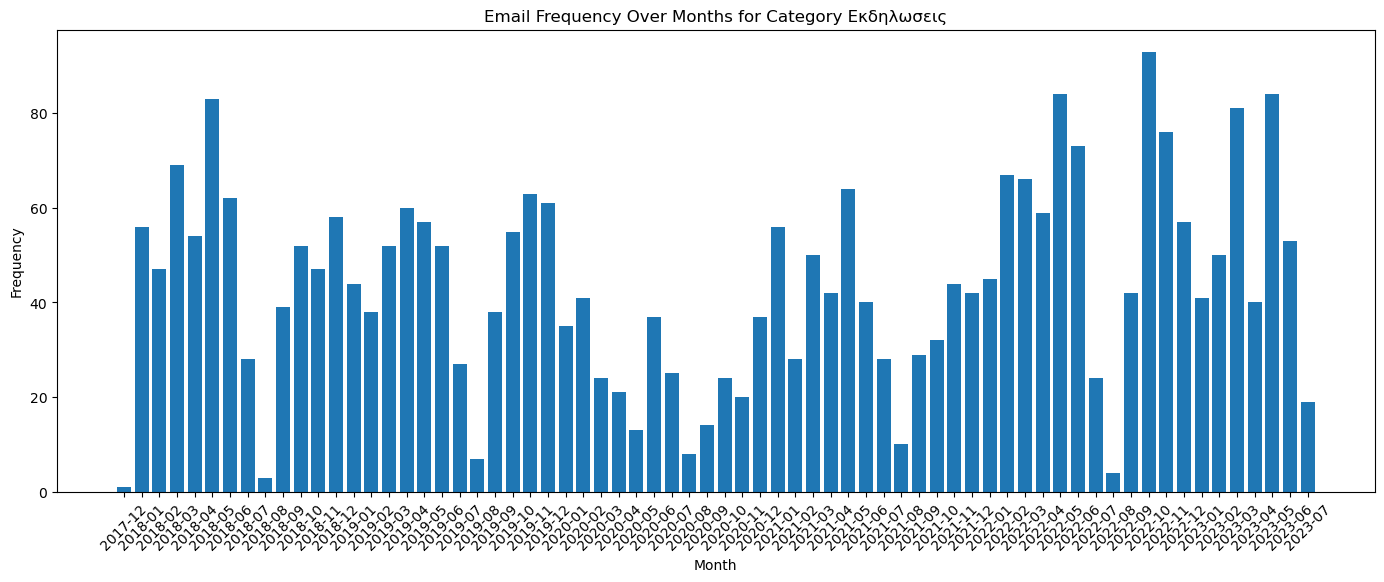

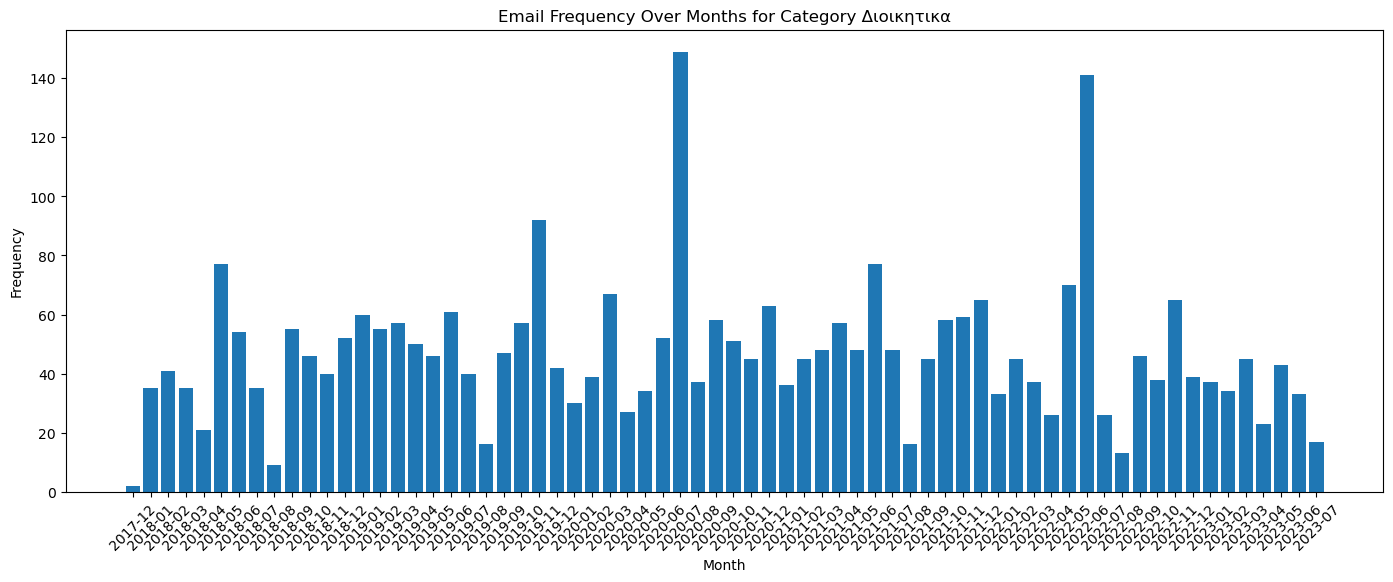

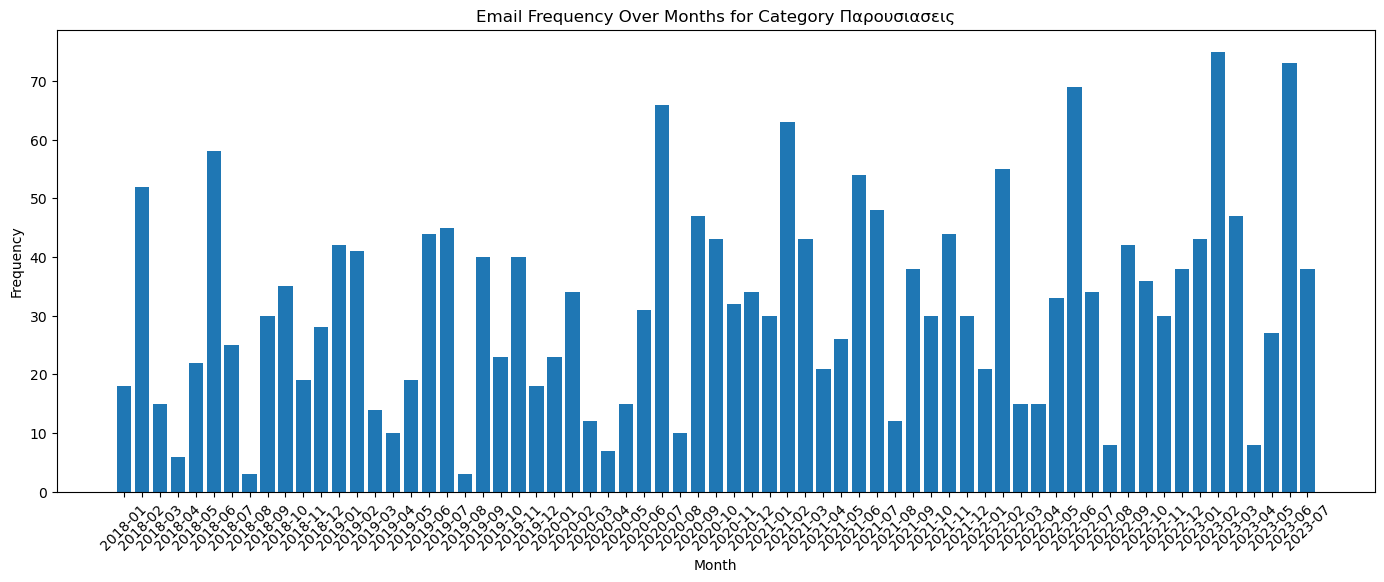

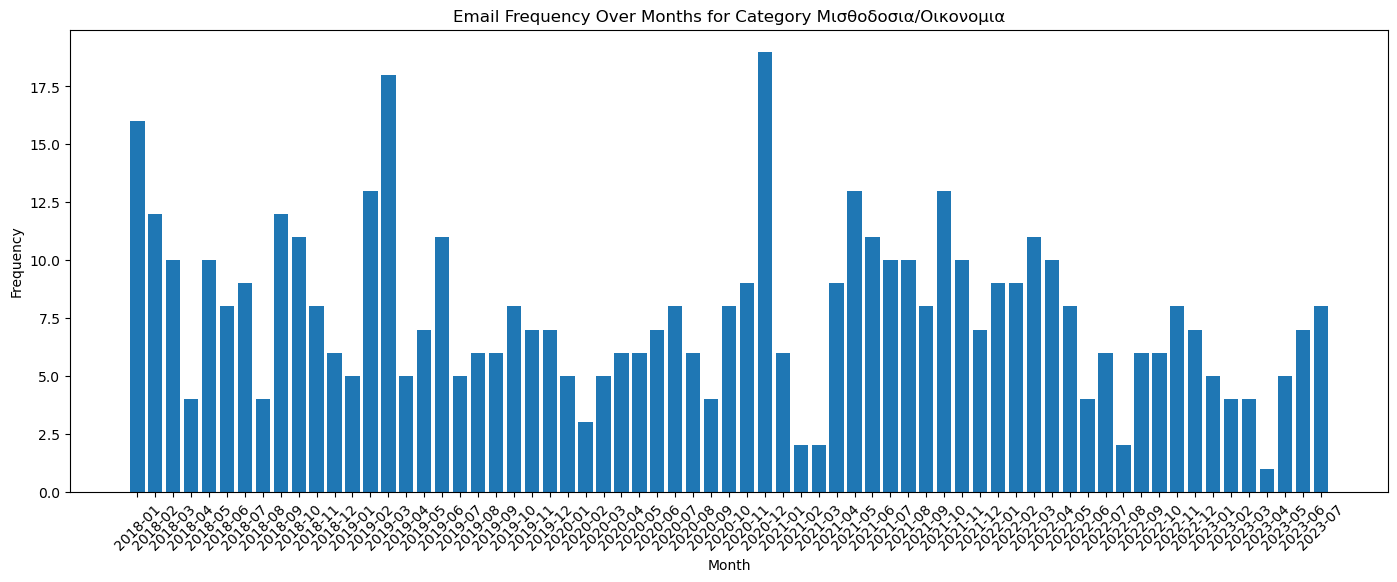

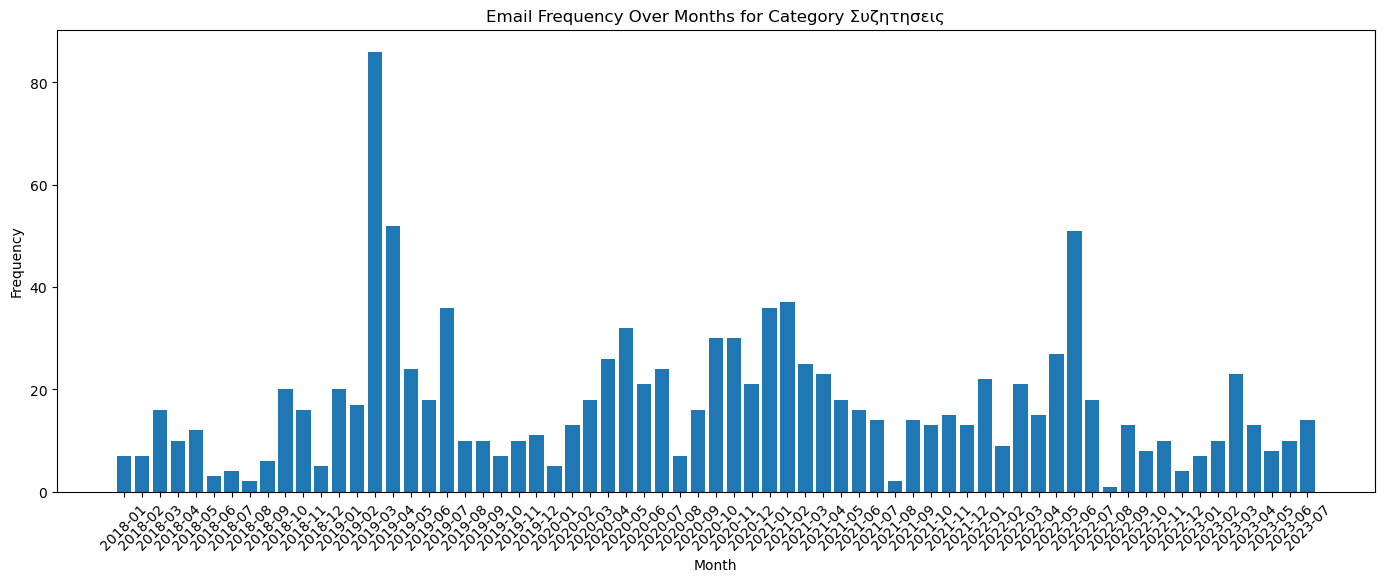

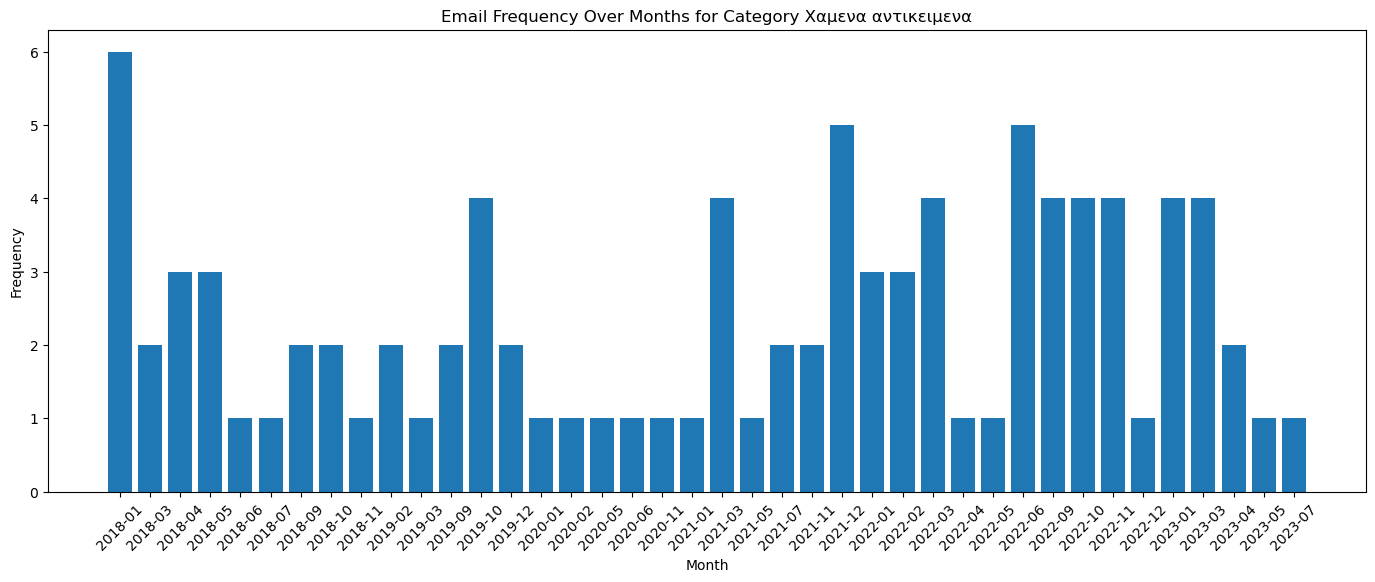

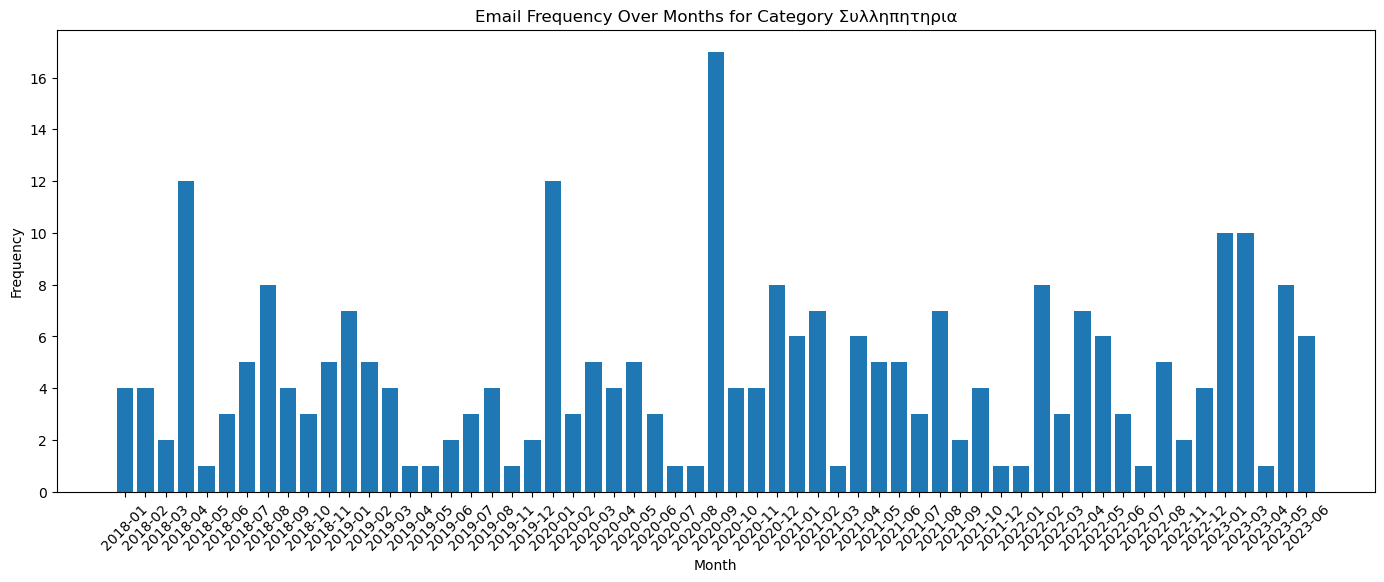

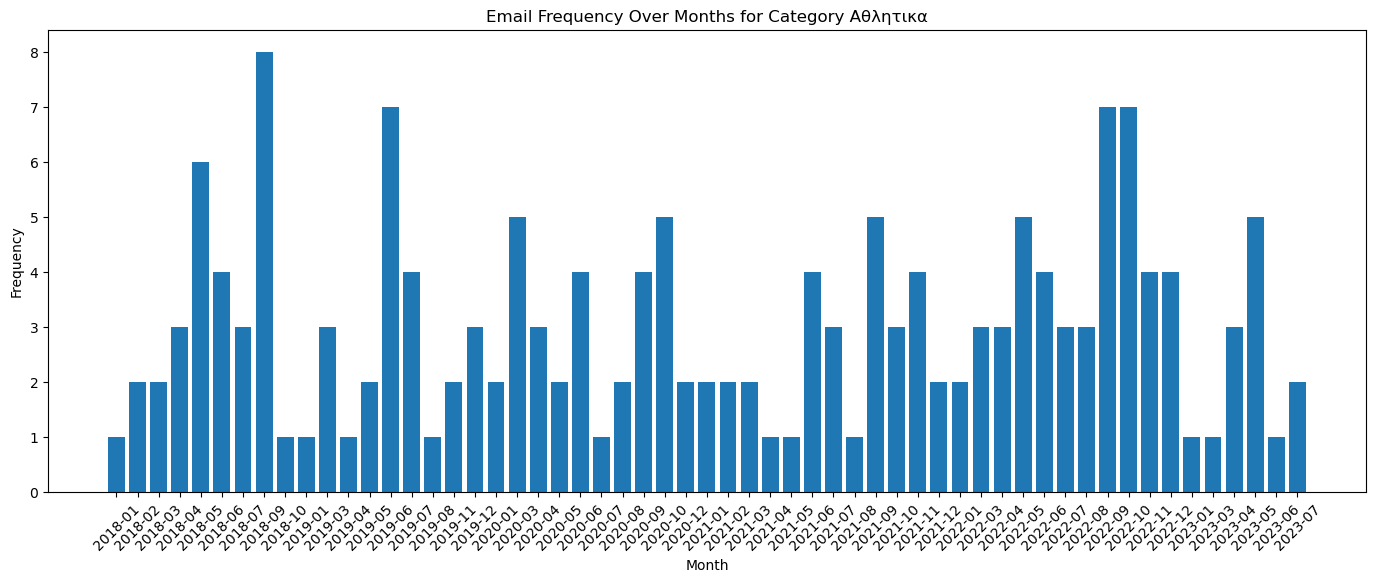

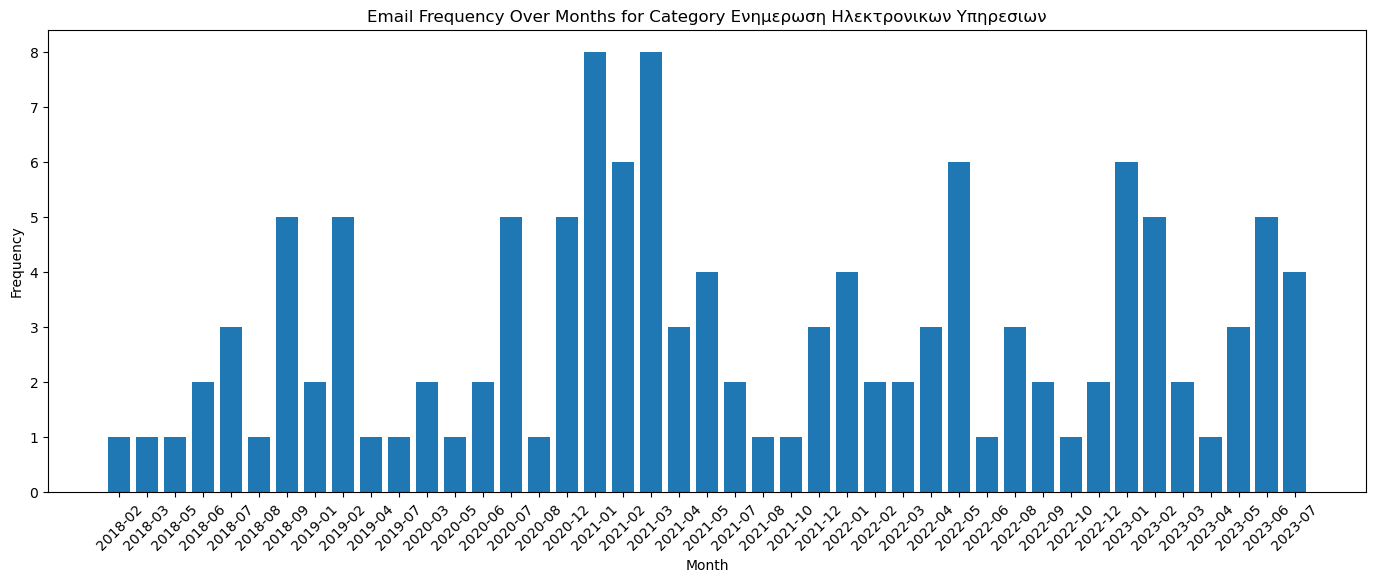

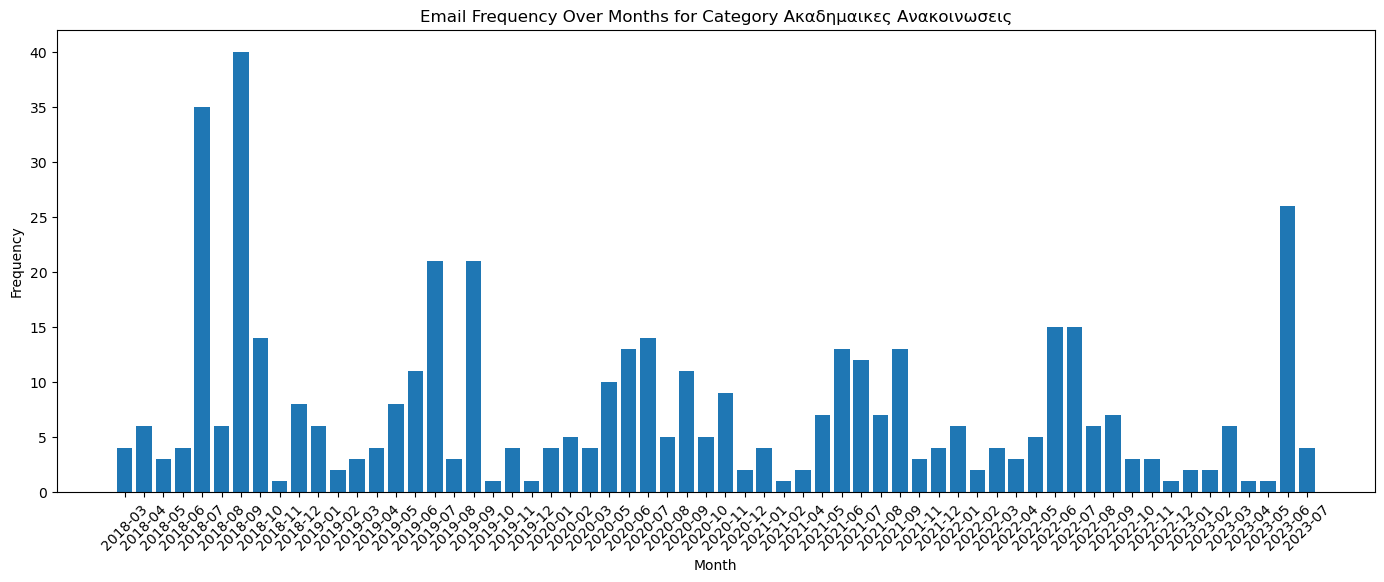

In [216]:
categories = df['Topic'].unique()
for category in categories:
    category_data = df[df['Topic'] == category]
    
    grouped = category_data.groupby('Month').size()
    
    plt.figure(figsize=(17, 6))
    plt.bar(grouped.index.astype(str), grouped.values)
    
    plt.title(f'Email Frequency Over Months for Category {category}')
    plt.xlabel('Month')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45) 
    
    plt.show()

In [217]:
df.to_csv('labeled_bagofwords.csv', sep='\t', encoding='utf-32')